In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Week 7: Visualization

In this class, we learn how to generate plots in Python using [matplotlib](https://matplotlib.org) library. You can find many useful tutorials and code examples for matplotlib [here](https://matplotlib.org/stable/tutorials/index). 

Since we want to create and explore figures in this class, we will use Jupyter Notebook to write the solutions.

## Exercise 5.1: Gaussian random walk
A Gaussian random walk can be represented as a sum of independent Gaussian variables $X_i\sim\mathcal{N}(0,1)$:

$$S_n = \sum_{i=1}^n X_i$$

**a)** Generate $n=1000$ independent draws from the standard Gaussian distribution and plot the Gaussian random walk that they create.

Text(0, 0.5, '$S_n$')

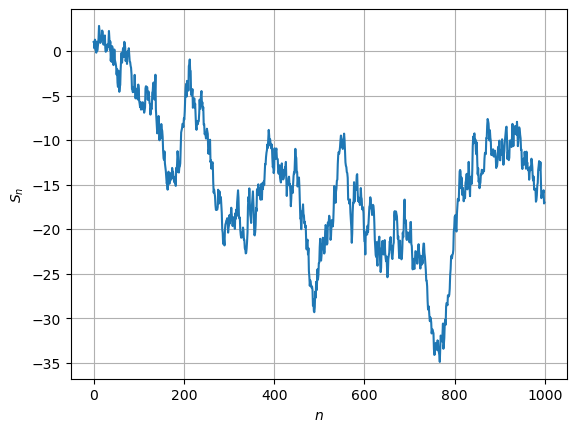

In [5]:
n = 1000

X = np.random.normal(size=n) # generate an array with n elements, where each element is drawn from the standard normal distribution
walk = np.cumsum(X,axis=0) # np.cumsum returns a cummulative sum of numpy array over a given axis

plt.plot(walk) # generate a line plot

plt.grid() # add grid to the plot
plt.xlabel("$n$") # add label of x axis
plt.ylabel("$S_n$") # add label of y axis
                    # Note that you can use (limited) latex syntax in captions of matplotlib graphs

**b)** Plot many (e.g. 100) independent Gaussian random walks in the same plot using only one color. You can decrease the line width and increase the plot size to improve readability of your figure. Notice that the standart deviation of $S_n$ is given by $\sqrt{n}$. Plot curves $3\sqrt{n}$ and $-3\sqrt{n}$ using a different color on the same plot. 

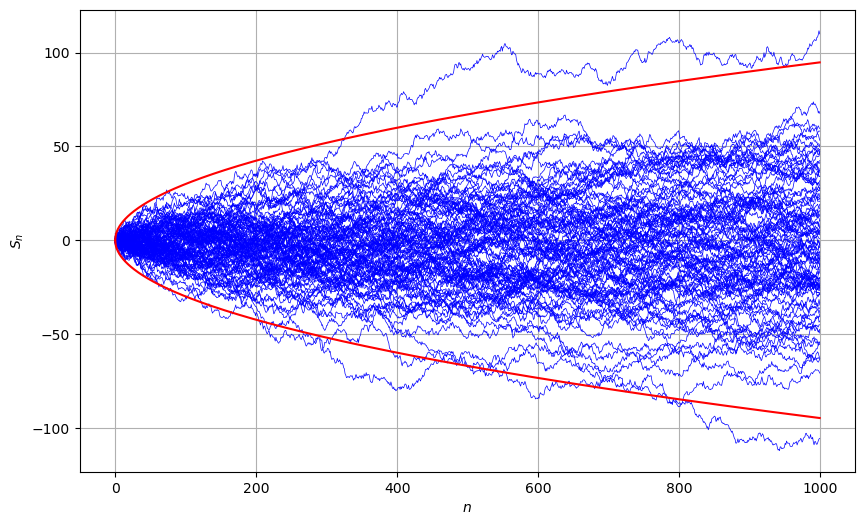

In [6]:
fig, ax = plt.subplots(figsize=(10,6)) # set figure size to (10,5)

n = 1000

for _ in range(100):
    X = np.random.normal(size=n)
    walk = np.cumsum(X,axis=0)
    plt.plot(walk, color='b', linewidth=0.5) # specify color and line width 
    
plt.grid() # add grid to the plot

plt.plot(3*np.sqrt(np.arange(n)), color='r')
plt.plot(-3*np.sqrt(np.arange(n)), color='r')

plt.xlabel("$n$") 
plt.ylabel("$S_n$") 

# Exercise 5.2: Bifurcation diagram

The *logistic map* generates a sequence $\{x_n\}$ using the following relation:
$$x_{n+1} = r x_n(1-x_n),$$
where $r$ is a postive constant and $x_0\in(0,1)$. The goal of this task is to plot the so-called *bifurcation diagram* of this map as a function of $r$ (also called the bifurcation parameter).

To get motivated, you can check out [this great Veritasium video](https://www.youtube.com/watch?v=ovJcsL7vyrk) about the logistic map.

**a)** Write a function that calculates the first $n$ members of the logistic map sequence, given $x_0$, $r$ and $n$.

In [7]:
def logistic_map(r,x0,n):
    x = [x0]
    for i in range(n):
        x.append(r*x[-1]*(1.-x[-1])) 
    return x

**b)** Plot the first 100 elements of the sequence for several values of $r$, e.g. $r\in\{1.0,2.5,3.0\}$, as a line plot (i.e., using function ```plt.plot()```). You can try different values of $x_0$. What do you observe?

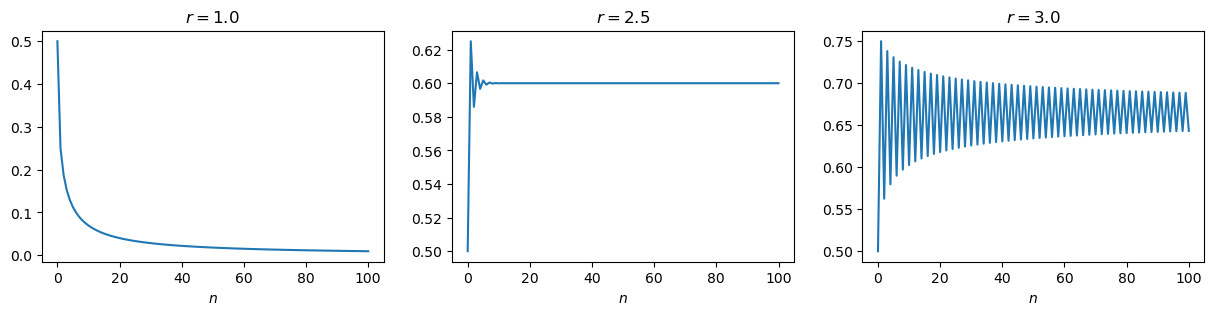

In [8]:

# We generate a plot with three subplots (one row and three columns)
fig, ax = plt.subplots(1,3, figsize=(15,3)) 

rs = [1.0,2.5,3.0]
n = 100

for ax_,r in zip(ax,rs): # iterate over axis (subplots) and rs
    ax_.plot(logistic_map(r,0.5,n))
    ax_.set_title("$r=$"+str(r)) # notice that plt.title but ax.set_title
    ax_.set_xlabel("$n$")     # notice that plt.xlabel but ax.set_xlabel

**c)** Now we finally plot the well-known [bifurcation diagram](https://en.wikipedia.org/wiki/Bifurcation_diagram). For values of $r$ between $0$ and $4$ with step $0.01$, calculate the first $n=1000$ elements of the sequence $\{x_n\}$. Then, for each value of $r$, plot the last $100$ values of the sequence in the same x-coordinate $r$. You can do this using a scatter plot (i.e., function ```plt.scatter()```). 

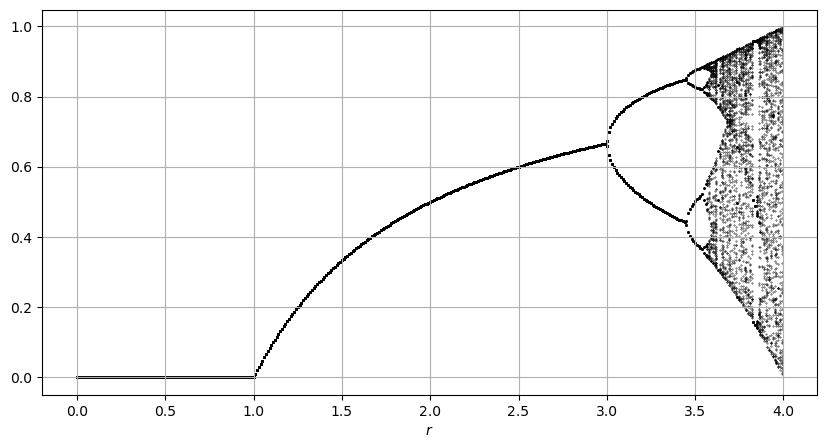

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

k = 100

for r in np.arange(0,4,0.01):
    points = logistic_map(r,0.5,1000)
    # We plot 100 points for the same value of r, so we use [r]*100 for the x axis
    plt.scatter([r]*k,points[-k:],s=0.1,color='black') # specify color and marker size (s=0.1)

plt.grid()

plt.xlabel("$r$")

## Exercise 3: Wigner semicircle distribution

[Wigner semicircle distribution](https://en.wikipedia.org/wiki/Wigner_semicircle_distribution) arises as the limiting distribution of the eigenvalues of certain random matrices when the dimension of the matrix tends to infinity. In this task, you will need to generate a large random matrix, and then plot its eigenvalues. 

**a)** Generate a *symmetric* random matrix with independent entries, where each entry has standard normal distribution.

In [3]:
n = 5000 # size of the matrix

# We generate a symmetric matrix as a sum of a random matrix M and M.T
# To keep the variance equal to 1, we normalize by sqrt(2)
mat_normal = np.random.standard_normal((n,n))
mat = (mat_normal + mat_normal.T)/ np.sqrt(2)


**b)** Since the generated matrix has i.i.d. standard normal values, it is almost surely invertible. Compute the determinant of your matrix to check if it is indeed invertible. Note: computing a determinant of a large matrix can cause overflow errors. You can solve this problem by using ```np.linalg.slogdet``` function, which computes the sign and logarithm of the determinant, instead of ```np.linalg.det```.

In [4]:
det = np.linalg.slogdet(mat) # np.linalg.slogdet() returns the sign and the logarithm of the matrix (check the documentation!)

if det[0] == 0: # det[0] is the sign of the determinant, det[1] is the value of the logaritm of the determinant
                # The sign is zero only when the determinant is zero (see the documentation)

    print("The determinant is zero, so the matrix is not invertible!")
else:
    print("The determinant is non-zero, so the matrix is invertible!")

The determinant is non-zero, so the matrix is invertible!


**c)** Even if the determinant of a matrix is non-zero, it is not a good idea to invert the matrix if it is too *ill-conditioned*, i.e., if its condition number is too large. The reason is that small errors in an ill-conditioned matrix can lead to very large errors in the inverse. For the purposes of machine computations, one can say that the condition number is too large if it exceeds $1/\epsilon$, where $\epsilon$ is the smallest number of a given type that the machine can store. Then for a matrix ```mat``` generated in previous subtasks, the value of $\epsilon$ is then given by the output of ```np.finfo(mat.dtype).eps```.

Calculate the condition number of your matrix and check whether the matrix is ill-conditioned. 

In [36]:
cond = np.linalg.cond(mat)

if cond > 1./np.finfo(mat.dtype).eps:
    print("The matrix is ill-conditioned!")
else:
    print("The matrix is not so ill-conditioned.")

The matrix is not so ill-conditioned.


**d)** Compute eigenvalues of the matrix and plot them in a *histogram*. You can use ```plt.hist()``` function for the histogram, and ```np.linalg.eigvalsh``` function to find eigenvalues of a symmetric matrix (see numpy documentation for the differences between ```np.linalg.eig```, ```np.linalg.eigh```, ```np.linalg.eigvals```, and ```np.linalg.eigvalsh```). Try different sizes of the matrix and observe how the eigenvalues' distribution changes.

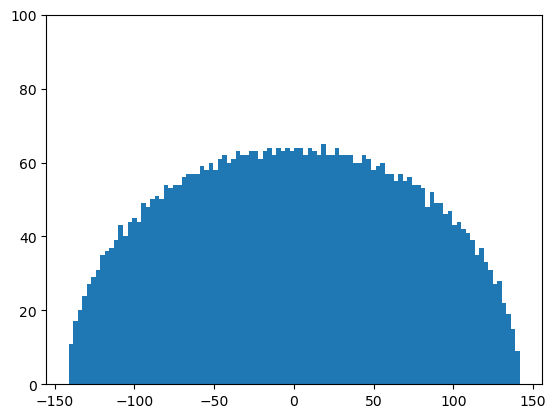

In [42]:
plt.hist(np.linalg.eigvalsh(mat), bins=100)
plt.ylim(0,100)